# **Importing the necessary libraries**

In [20]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations on arrays
import matplotlib.pyplot as plt  # For plotting and visualization
import tensorflow as tf  # For building and training neural network models
import os  # For interacting with the operating system, e.g., file paths
import random  # For generating random numbers
import cv2  # For image processing operations using OpenCV

# Importing Keras, a high-level neural networks API
import keras
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
# These layers are used for building neural network architectures, especially for computer vision tasks

from keras import backend as K  # To interact with the backend (like TensorFlow)
from keras.activations import sigmoid  # Sigmoid activation function, often used in binary classification
from keras import layers, ops  #  To access various layers for neural network construction
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# For image data augmentation and preprocessing

from keras import initializers  # For initializing model weights
from keras.models import Sequential  # For sequential model building in Keras

In [2]:
#Dependencies
import os  # For operating system interactions, like file path management.
import numpy as np  # For numerical operations, particularly with arrays.
import pandas as pd  # For data manipulation and analysis.
import matplotlib.pyplot as plt  # For plotting and visualization.
import seaborn as sns  # For more advanced data visualization.

import tensorflow as tf  # Core library for machine learning and neural networks.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# For real-time data augmentation and preprocessing of image data.

from tensorflow.keras.models import Sequential
# For building a linear stack of layers in a neural network model.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Conv2D: For convolutional layers that extract features from images.
# MaxPooling2D: For downsampling the spatial dimensions of an image.
# Flatten: To convert pooled feature maps into a single column that is fed to the dense layer.
# Dense: For fully connected layers in a neural network.
# Dropout: For reducing overfitting by randomly setting input units to 0 at each update during training.

from tensorflow.keras.optimizers import Adam  # An optimizer for training the model.

from sklearn.metrics import classification_report, confusion_matrix
# classification_report: For measuring the quality of predictions from a classification algorithm.
# confusion_matrix: For evaluating the accuracy of a classification.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import tensorflow as tf  # Core library for machine learning and neural networks.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# **Data Preperation**

[Datasets Link](https://www.kaggle.com/datasets/dilkushsingh/facial-emotion-dataset)

## *Mount Google Drive*


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *Unzip Dataset*

In [6]:
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/facial_expression_recognation_cban_x_cnn/facial_emotion_dataset.zip'
destination_directory = '/content/facial_emotion_dataset/'

# Create the destination directory if it doesn't exist
!mkdir -p "{destination_directory}"

# Unzip the dataset
!unzip -q "{zip_file_path}" -d "{destination_directory}"

print(f"Dataset unzipped to: {destination_directory}")

Dataset unzipped to: /content/facial_emotion_dataset/


In [7]:
!ls /content/facial_emotion_dataset

LICENSE  README.md  test_dir  train_dir


## *Define Labels and Dataset Paths*

In [8]:
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

destination_directory = '/content/facial_emotion_dataset/' # Ensure this variable is defined

train_dir = os.path.join(destination_directory, 'train_dir')
test_dir = os.path.join(destination_directory, 'test_dir')

print(f"Labels defined: {labels}")
print(f"Training directory: {train_dir}")
print(f"Testing directory: {test_dir}")

Labels defined: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Training directory: /content/facial_emotion_dataset/train_dir
Testing directory: /content/facial_emotion_dataset/test_dir


## *Load Training and Test Data*


In [9]:
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
img_size = 150

def get_training_data(data_dir):
    data = []
    skipped_image_count = 0
    for label in labels:
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"Warning: Directory not found: {path}. Skipping.")
            continue
        class_num = labels.index(label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    data.append([resized_arr, class_num])
                else:
                    skipped_image_count += 1
            except Exception as e:
                # Catching specific errors if needed, otherwise general exception is fine
                skipped_image_count += 1
    if skipped_image_count > 0:
        print(f"Summary: Skipped {skipped_image_count} unreadable images in {data_dir}.")
    return np.array(data, dtype=object)

train_data = get_training_data(train_dir)
test_data = get_training_data(test_dir)

print(f"Training data loaded with shape: {train_data.shape}")
print(f"Testing data loaded with shape: {test_data.shape}")

Summary: Skipped 266 unreadable images in /content/facial_emotion_dataset/train_dir.
Training data loaded with shape: (29151, 2)
Testing data loaded with shape: (7340, 2)


## *Data Visualization & Preprocessing*

<Axes: xlabel='count'>

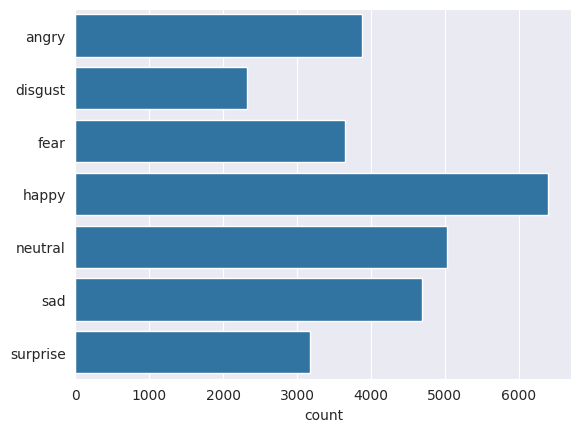

In [10]:
l = []
for i in train_data:
    if(i[1] == 0):
        l.append("angry")
    elif(i[1] == 1):
        l.append("disgust")
    elif(i[1] == 2):
        l.append("fear")
    elif(i[1] == 3):
        l.append("happy")
    elif(i[1] == 4):
        l.append("neutral")
    elif(i[1] == 5):
        l.append("sad")
    else:
        l.append("surprise")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'surprise')

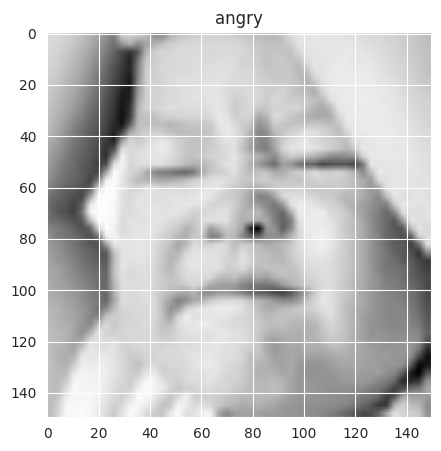

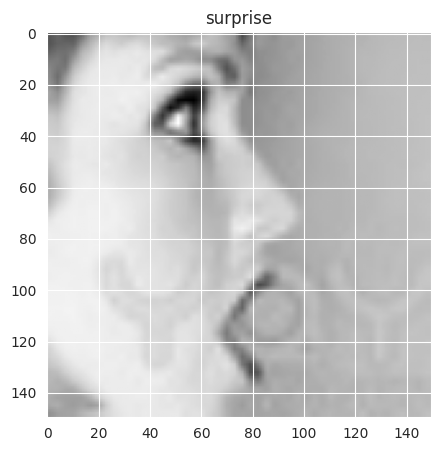

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train_data[0][0], cmap='gray')
plt.title(labels[train_data[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train_data[-1][0], cmap='gray')
plt.title(labels[train_data[-1][1]])

## *Split to Train and Test to Images and Labels*

Untuk sekarang kita tidak pakai data validasi, makanya dikomentar

In [12]:
from sklearn.model_selection import train_test_split

# Extract features (images) and labels from train_data and test_data
X_train_full = np.array([i[0] for i in train_data])
y_train_full = np.array([i[1] for i in train_data])
X_test = np.array([i[0] for i in test_data])
y_test = np.array([i[1] for i in test_data])

# Split the full training data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

print(f"Initial x_train shape: {x_train.shape}")
print(f"Initial y_train shape: {y_train.shape}")
print(f"Initial x_val shape: {x_val.shape}")
print(f"Initial y_val shape: {y_val.shape}")
print(f"Initial x_test shape: {X_test.shape}")
print(f"Initial y_test shape: {y_test.shape}")

Initial x_train shape: (23320, 150, 150)
Initial y_train shape: (23320,)
Initial x_val shape: (5831, 150, 150)
Initial y_val shape: (5831,)
Initial x_test shape: (7340, 150, 150)
Initial y_test shape: (7340,)


In [13]:
# Normalize the data
x_train = x_train / 255
x_val = x_val / 255
X_test = X_test / 255

In [14]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

## *Data Augmentation*

In [37]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(

        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        shear_range=0.2,
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation, i choosed to :

- Randomly rotate some training images by 30 degrees
- Randomly Zoom by 20% some training images
- Randomly shift images horizontally by 20% of the width
- Randomly shift images vertically by 20% of the height
- Randomly flip images horizontally. Once our model is ready, we fit the training dataset.

# **Training the Model**


Is one architecture to Attention mechanism and most common used from between all other architecture from Attention Mechanism and content on channel and spatial Attention module

## *CBAM Block Functions*

In [38]:
import tensorflow as tf
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda

def cbam_block(cbam_feature, ratio=8):
    """
    Menggabungkan Channel Attention Module dan Spatial Attention Module
    """
    # 1. Channel Attention Module
    cbam_feature = channel_attention(cbam_feature, ratio)

    # 2. Spatial Attention Module
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    """
    Fokus pada 'APA' yang penting (fitur mana yang dominan).
    Mengkompresi dimensi Spatial (H, W) -> menyisakan Channel.
    """
    channel = input_feature.shape[-1]

    # Shared MLP (Multi-Layer Perceptron)
    # Menggunakan Dense layer yang dibagi untuk Avg dan Max pool
    shared_layer_one = Dense(channel // ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    # Jalur Average Pooling
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    # Jalur Max Pooling
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    # Menggabungkan dan memberikan bobot
    cbam_feature = Add()([avg_pool, max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)

    return Multiply()([input_feature, cbam_feature])

def spatial_attention(input_feature):
    """
    Fokus pada 'DIMANA' yang penting (lokasi fitur wajah).
    Mengkompresi dimensi Channel -> menyisakan Spatial map.
    """
    kernel_size = 7

    # PERBAIKAN UTAMA DISINI:
    # Menggunakan tf.reduce_mean/max secara langsung di dalam Lambda
    # axis=3 (atau -1) berarti kita merata-rata di sepanjang channel
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_feature)
    max_pool = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_feature)

    # Gabungkan (Concatenate) kedua feature map tersebut
    concat = Concatenate(axis=-1)([avg_pool, max_pool])

    # Lakukan konvolusi untuk mendapatkan spatial attention map
    cbam_feature = Conv2D(filters=1,
                          kernel_size=kernel_size,
                          strides=1,
                          padding='same',
                          activation='sigmoid',
                          kernel_initializer='he_normal',
                          use_bias=False)(concat)

    return Multiply()([input_feature, cbam_feature])

## *CNN Layers*

In [39]:
import tensorflow as tf
from keras import layers, models, Input

# Pastikan fungsi cbam_block sudah didefinisikan sebelumnya (menggunakan kode perbaikan saya tadi)

# Input Layer
input_layer = Input(shape=(150, 150, 1))

# --- BLOCK 1 ---
# Conv -> BN -> CBAM -> Pool
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = cbam_block(x)  # Pasang CBAM disini (saat fitur masih kaya)
x = layers.MaxPooling2D((2, 2))(x)

# --- BLOCK 2 ---
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = cbam_block(x)
x = layers.MaxPooling2D((2, 2))(x)

# --- BLOCK 3 ---
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = cbam_block(x)
x = layers.MaxPooling2D((2, 2))(x)

# --- BLOCK 4 ---
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = cbam_block(x)
x = layers.MaxPooling2D((2, 2))(x)

# --- CLASSIFICATION HEAD ---
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x) # Dropout 0.2 sudah cukup standar
output_layer = layers.Dense(units=7, activation='softmax')(x)

# Create Model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer="rmsprop",
              # Gunakan 'sparse' jika labelmu angka (0,1,2..)
              # Gunakan 'categorical_crossentropy' jika labelmu One-Hot ([0,0,1,0..])
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 150, 150,  │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 150,  │        128 │ conv2d_52[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_64          │ (None, 1, 1, 32)  │          0 │ global_average_p… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_65          │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 1, 1, 4)   │        132 │ reshape_64[0][0], │
│                     │                   │            │ reshape_65[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 1, 1, 32)  │        160 │ dense_74[0][0],   │
│                     │                   │            │ dense_74[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_32 (Add)        │ (None, 1, 1, 32)  │          0 │ dense_75[0][0],   │
│                     │                   │            │ dense_75[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 1, 1, 32)  │          0 │ add_32[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_64         │ (None, 150, 150,  │          0 │ batch_normalizat… │
│ (Multiply)          │ 32)               │            │ activation_32[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_64 (Lambda)  │ (None, 150, 150,  │          0 │ multiply_64[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_65 (Lambda)  │ (None, 150, 150,  │          0 │ multiply_64[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_32      │ (None, 150, 150,  │          0 │ lambda_64[0][0],  │
│ (Concatenate)       │ 2)                │            │ lambda_65[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 150, 150,  │         98 │ concatenate_32[0… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_65         │ (None, 150, 150,  │          0 │ multiply_64[0][0

 Total params: 5,722,923 (21.83 MB)

 Trainable params: 5,721,963 (21.83 MB)

 Non-trainable params: 960 (3.75 KB)

## *Train Model*

In [40]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2,verbose=1,factor=0.8 , min_lr = 0.000001)

In [41]:
# Perbaikan: Gunakan datagen.flow() agar augmentasi jalan
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32), # <--- PENTING: Pakai datagen.flow
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[learning_rate_reduction]
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


729/729 ━━━━━━━━━━━━━━━━━━━━ 73s 79ms/step - accuracy: 0.2029 - loss: 2.2241 - val_accuracy: 0.2415 - val_loss: 1.8553 - learning_rate: 0.0010
Epoch 2/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.2517 - loss: 1.8332 - val_accuracy: 0.2264 - val_loss: 2.0266 - learning_rate: 0.0010
Epoch 3/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.2818 - loss: 1.7818 - val_accuracy: 0.2564 - val_loss: 1.8515 - learning_rate: 0.0010
Epoch 4/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.3158 - loss: 1.7119 - val_accuracy: 0.1619 - val_loss: 3.4880 - learning_rate: 0.0010
Epoch 5/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.3573 - loss: 1.6413 - val_accuracy: 0.3852 - val_loss: 1.5949 - learning_rate: 0.0010
Epoch 6/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.3835 - loss: 1.5879 - val_accuracy: 0.2207 - val_loss: 2.2425 - learning_rate: 0.0010
Epoch 7/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.4010 - loss: 1.5518

In [42]:
my_model = model.save('fer_model.h5')  # creates a HDF5 file 'fer_model.h5'

In [84]:
# save model to google drive
!cp /content/history2.h5 '/content/drive/MyDrive/Colab Notebooks/facial_expression_recognation_cban_x_cnn/fer_model.h5'

In [43]:
model.save('my_model2.keras')   # creates a karas file

## *Evaluation*

In [44]:
print("Loss_train of the model is - " , model.evaluate(x_train,y_train)[0])
print("Accuracy_train of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("_____________________________________________ ")
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

729/729 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6612 - loss: 0.9128
Loss_train of the model is -  0.904386043548584
729/729 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6612 - loss: 0.9128
Accuracy_train of the model is -  66.08490347862244 %
_____________________________________________ 
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5762 - loss: 1.1253
Loss of the model is -  1.009448528289795
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5762 - loss: 1.1253
Accuracy of the model is -  62.26158142089844 %


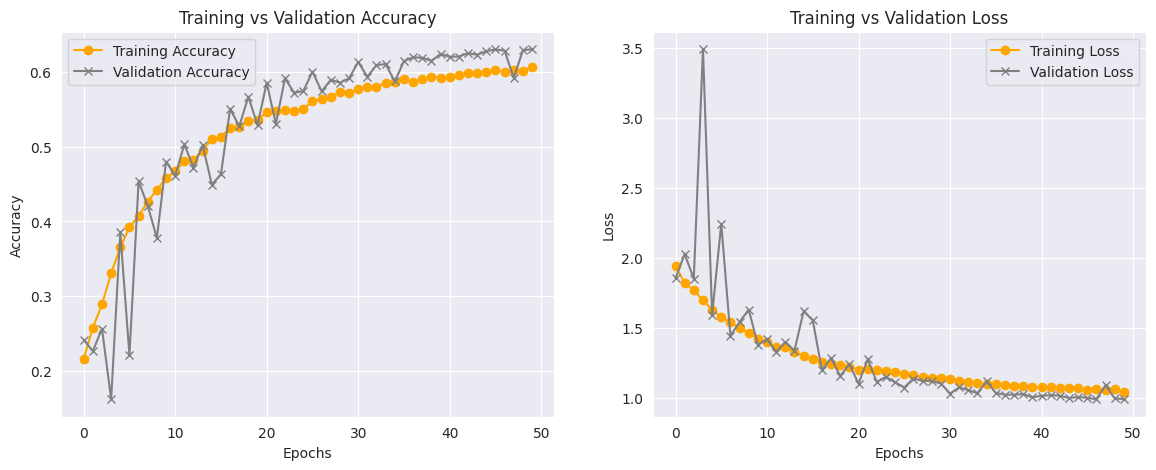

In [46]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Mengambil nilai akurasi dan loss dari history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc)) # Menentukan sumbu X (jumlah epoch)

    # --- MEMBUAT GRAFIK ---
    plt.figure(figsize=(14, 5))

    # 1. Grafik Akurasi
    plt.subplot(1, 2, 1) # Gambar di kiri
    plt.plot(epochs, acc, label='Training Accuracy', color='orange', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='gray', marker='x')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 2. Grafik Loss
    plt.subplot(1, 2, 2) # Gambar di kanan
    plt.plot(epochs, loss, label='Training Loss', color='orange', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', color='gray', marker='x')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Panggil fungsinya
plot_training_history(history)

# **Model Usage**

## *Without Face Detection*

In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, Input
from keras.preprocessing import image

# ==========================================
# BAGIAN 1: DEFINISI ULANG ARSITEKTUR (TUBUH)
# ==========================================

def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    shared_layer_one = layers.Dense(channel // ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
    shared_layer_two = layers.Dense(channel, kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')

    avg_pool = layers.GlobalAveragePooling2D()(input_feature)
    avg_pool = layers.Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = layers.GlobalMaxPooling2D()(input_feature)
    max_pool = layers.Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam_feature = layers.Add()([avg_pool, max_pool])
    cbam_feature = layers.Activation('sigmoid')(cbam_feature)
    return layers.Multiply()([input_feature, cbam_feature])

def spatial_attention(input_feature):
    # Menggunakan tf.reduce_mean untuk menghindari error Lambda saat loading
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_feature)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_feature)
    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    cbam_feature = layers.Conv2D(filters=1, kernel_size=7, strides=1, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(concat)
    return layers.Multiply()([input_feature, cbam_feature])

def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def build_model():
    # Arsitektur ini SAMA PERSIS dengan yang ada di notebook kamu
    input_layer = Input(shape=(150, 150, 1))

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 4
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Classification Head
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output_layer = layers.Dense(7, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# ==========================================
# BAGIAN 2: LOAD BOBOT (OTAK) & PREDIKSI
# ==========================================

# 1. Bangun arsitektur
model = build_model()

# 2. Muat bobot dari file .h5
try:
    model.load_weights('history2.h5') # Pastikan nama file sesuai
    print("✅ Berhasil! Model siap digunakan.")
except Exception as e:
    print("❌ Gagal memuat bobot:", e)

# 3. Definisikan Label (Sesuaikan urutan alfabetis folder datasetmu)
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(image_path):
    # Preprocessing
    img = image.load_img(image_path, color_mode='grayscale', target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array /= 255.0 # Normalisasi
    img_batch = np.expand_dims(img_array, axis=0) # Tambah dimensi batch

    # Prediksi
    prediction = model.predict(img_batch, verbose=0)
    idx = np.argmax(prediction)
    label = class_labels[idx]
    confidence = prediction[0][idx] * 100

    # Tampilkan Gambar
    plt.figure(figsize=(4, 4))
    plt.imshow(image.load_img(image_path)) # Tampilkan versi asli (berwarna)
    plt.axis('off')
    plt.title(f"Prediksi: {label}\n({confidence:.2f}%)", color='blue', fontsize=14)
    plt.show()

# ==========================================
# CONTOH PENGGUNAAN
# ==========================================
# Ganti 'foto_tes.jpg' dengan nama file gambarmu
# predict_emotion('foto_tes.jpg')

✅ Berhasil! Model siap digunakan.


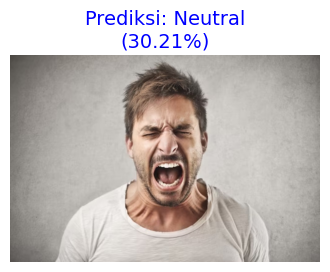

In [53]:
predict_emotion('marah.jpg')

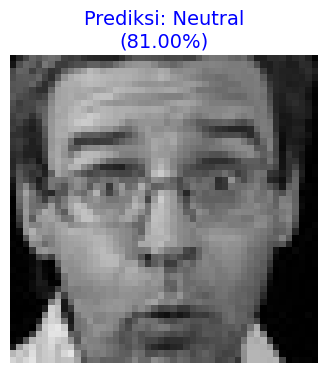

In [54]:
predict_emotion("surptise.jpg")

## *With Face Detection*

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_emotion_eval(image_path, true_label):
    # 1. Load Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # 2. Baca Gambar
    img_origin = cv2.imread(image_path)
    if img_origin is None:
        print("Error: Gambar tidak ditemukan!")
        return

    gray = cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY)

    # 3. Deteksi Wajah
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) == 0:
        print("Wajah tidak terdeteksi! Coba gambar lain.")
        return

    # 4. Loop setiap wajah
    for (x, y, w, h) in faces:
        # Preprocessing
        face_roi = gray[y:y+h, x:x+w]
        final_image = cv2.resize(face_roi, (150, 150))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = np.expand_dims(final_image, axis=-1)
        final_image = final_image / 255.0

        # Prediksi
        prediction = model.predict(final_image, verbose=0)
        max_index = np.argmax(prediction)
        predicted_emotion = class_labels[max_index]
        confidence = prediction[0][max_index] * 100

        # --- LOGIKA WARNA (MODIFIKASI DISINI) ---
        # Bandingkan label asli vs prediksi (pakai .lower() biar tidak sensitif huruf besar/kecil)
        if predicted_emotion.lower() == true_label.lower():
            box_color = (0, 255, 0) # HIJAU (Benar)
            status_text = f"CORRECT: {predicted_emotion}"
        else:
            box_color = (0, 0, 255) # MERAH (Salah)
            # Menampilkan Prediksi Salah vs Label Seharusnya
            status_text = f"WRONG: {predicted_emotion} (True: {true_label})"

        # Gambar Kotak & Teks dengan warna dinamis
        cv2.rectangle(img_origin, (x, y), (x+w, y+h), box_color, 2)

        # Agar teks muat, kita atur ukuran font sedikit
        cv2.putText(img_origin, f"{status_text} ({confidence:.1f}%)",
                    (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, box_color, 2)

    # Tampilkan
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Target: {true_label} | Prediksi: {predicted_emotion}", fontsize=14)
    plt.show()

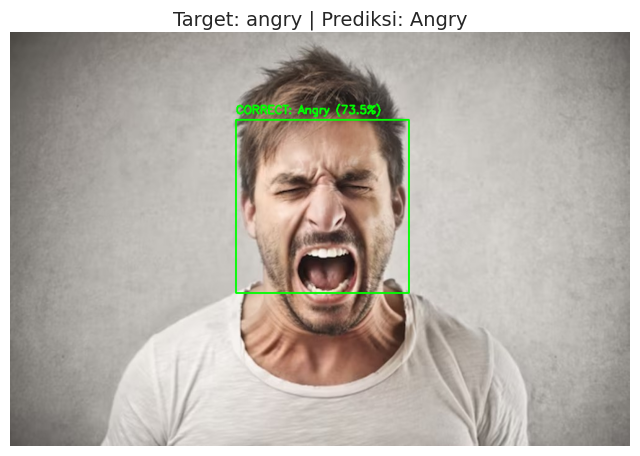

In [69]:
# Test dengan foto full body atau selfie biasa
predict_emotion_eval('marah.jpg', 'angry')

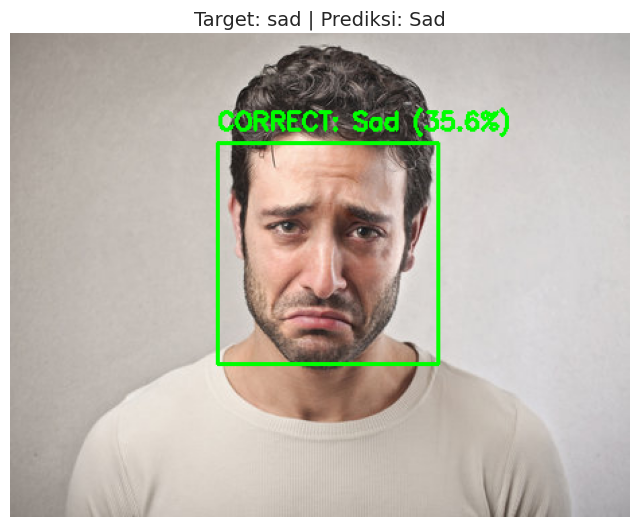

In [71]:
predict_emotion_eval('sad.jpg', 'sad')

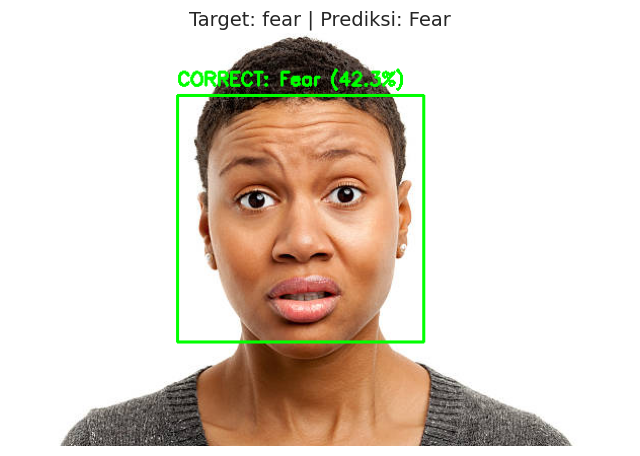

In [73]:
predict_emotion_eval('fear.jpg', 'fear')

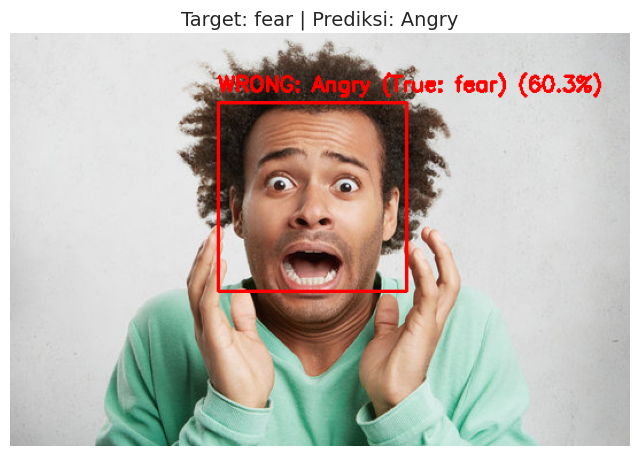

In [74]:
predict_emotion_eval('fear2.jpg', 'fear')

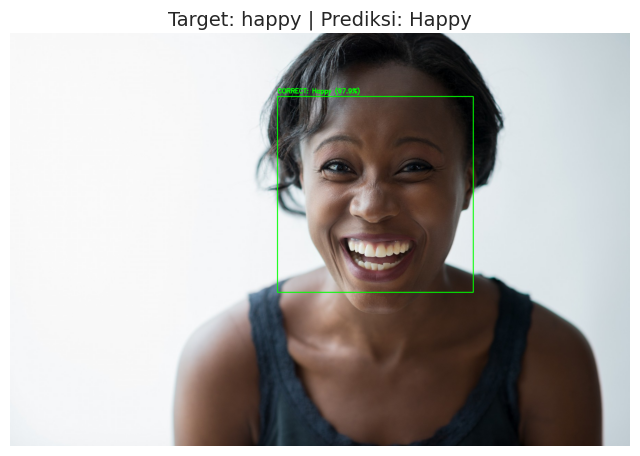

In [75]:
predict_emotion_eval('happy.jpg', 'happy')

## *Example App using Streamlit*

In [ ]:
import streamlit as st
import cv2
import numpy as np
import tensorflow as tf
from keras import layers, models, Input
from tensorflow.keras.preprocessing import image

# ==========================================
# 1. SETUP HALAMAN
# ==========================================
st.set_page_config(page_title="Ekspresi Wajah Real-Time", page_icon="😀", layout="centered")

st.title("😀 Deteksi Ekpresi Wajah")
st.write("Model CNN + CBAM akan mendeteksi ekspresi secara otomatis.")

# ==========================================
# 2. DEFINISI ARSITEKTUR MODEL (Wajib)
# ==========================================
def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    shared_layer_one = layers.Dense(channel // ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
    shared_layer_two = layers.Dense(channel, kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
    
    avg_pool = layers.GlobalAveragePooling2D()(input_feature)    
    avg_pool = layers.Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)
    
    max_pool = layers.GlobalMaxPooling2D()(input_feature)
    max_pool = layers.Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)
    
    cbam_feature = layers.Add()([avg_pool, max_pool])
    cbam_feature = layers.Activation('sigmoid')(cbam_feature)
    return layers.Multiply()([input_feature, cbam_feature])

def spatial_attention(input_feature):
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_feature)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_feature)
    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    cbam_feature = layers.Conv2D(filters=1, kernel_size=7, strides=1, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(concat)
    return layers.Multiply()([input_feature, cbam_feature])

def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def build_model():
    input_layer = Input(shape=(150, 150, 1))

    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    output_layer = layers.Dense(7, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# ==========================================
# 3. LOAD MODEL & CONFIG
# ==========================================
@st.cache_resource
def load_emotion_model():
    model = build_model()
    try:
        model.load_weights('fer_model.h5') 
        print("✅ Model Loaded!")
    except Exception as e:
        st.error(f"⚠️ Error: {e}")
    return model

model = load_emotion_model()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Palet Warna (BGR)
emotion_colors = {
    'Angry': (0, 0, 255),     # Merah
    'Disgust': (0, 128, 0),   # Hijau Gelap
    'Fear': (128, 0, 128),    # Ungu
    'Happy': (0, 255, 255),   # Kuning
    'Neutral': (255, 255, 255), # Putih
    'Sad': (255, 0, 0),       # Biru
    'Surprise': (0, 165, 255) # Oranye
}

# ==========================================
# 4. LOOP KAMERA OTOMATIS
# ==========================================
FRAME_WINDOW = st.image([]) # Placeholder gambar
camera = cv2.VideoCapture(0)

# Loop akan berjalan terus selama aplikasi dibuka
while True:
    ret, frame = camera.read()
    if not ret:
        st.warning("Kamera tidak terdeteksi.")
        break
    
    frame = cv2.flip(frame, 1) # Mirror effect
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        try:
            roi = cv2.resize(face_roi, (150, 150))
            roi = roi.astype("float") / 255.0
            roi = np.expand_dims(roi, axis=0)
            roi = np.expand_dims(roi, axis=-1)

            # Prediksi
            preds = model.predict(roi, verbose=0)[0]
            label_idx = np.argmax(preds)
            label = class_labels[label_idx]
            confidence = preds[label_idx] * 100

            # Visualisasi Warna
            color = emotion_colors.get(label, (0, 255, 0))

            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.rectangle(frame, (x, y-35), (x+w, y), color, -1)
            cv2.putText(frame, f"{label} ({confidence:.0f}%)", (x + 5, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2)
        
        except Exception:
            pass

    # Update tampilan di Streamlit
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    FRAME_WINDOW.image(frame_rgb)


2026-01-16 07:17:49.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:17:49.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [80]:
!streamlit run main.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.132.168:8501

  Stopping...
